In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geogif


## Open file

In [25]:
file_path = '/storage/cdalden/goes/goes16/2023/6/9/ABI-L1b-RadC/18/C05/'
file_name = 'OR_ABI-L1b-RadC-M6C05_G16_s20231601826184_e20231601828557_c20231601829002.nc'
ds = xr.open_dataset(file_path + file_name)


# add in lat and lon from 37N to 41N and -109 to -104
lat = np.linspace(37, 41, 320)
lon = np.linspace(-109, -104, 482)
ds['lat'] = xr.DataArray(lat, dims='lat')
ds['lon'] = xr.DataArray(lon, dims='lon')


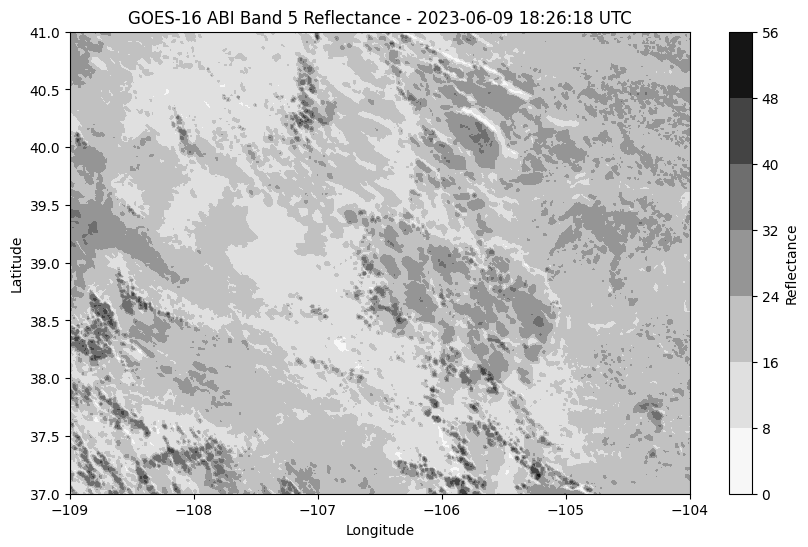

In [28]:
# Extract the x and y coordinates and the variable
x = ds.variables['lon'][:]
y = ds.variables['lat'][:]
var = ds.variables['Rad'][:]

# Create a meshgrid for plotting
X, Y = np.meshgrid(x, y)

# Plot the variable
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, var, cmap='Greys')
plt.colorbar(label='Reflectance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GOES-16 ABI Band 5 Reflectance - 2023-06-09 18:26:18 UTC')
plt.show()

## Find some clear days from SAIL data

#### note from Danny - feb 4 2023 was completely clear

In [7]:
sail_sebs = xr.open_dataset('/storage/cdalden/goes/sebs_20221001_20230930.nc')

sail_sebs

<xarray.Dataset> Size: 4MB
Dimensions:                        (time: 12349)
Coordinates:
  * time                           (time) datetime64[ns] 99kB 2022-10-01 ... ...
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 99kB ...
    time_offset                    (time) datetime64[ns] 99kB ...
    qc_time                        (time) int32 49kB ...
    down_short_hemisp              (time) float32 49kB ...
    qc_down_short_hemisp           (time) int32 49kB ...
    up_short_hemisp                (time) float32 49kB ...
    ...                             ...
    qc_temp_net_radiometer         (time) int32 49kB ...
    battery_voltage                (time) float32 49kB ...
    qc_battery_voltage             (time) int32 49kB ...
    lat                            (time) float32 49kB ...
    lon                            (time) float32 49kB ...
    alt                            (time) float32 49kB ...
Attributes: (12/26)
    command_line:            sebs_ingest -s guc -f S3
    process_version:         ingest-sebs-1.6-0.el7
    ingest_software:         ingest-sebs-1.6-0.el7
    dod_version:             sebs-b1-1.4
    site_id:                 guc
    facility_id:             S3: Mt Crested Butte, Colorado
    ...                      ...
    qc_bit_3_description:    Value is greater than the valid_max.
    qc_bit_3_assessment:     Bad
    qc_bit_4_description:    Difference between current and previous values e...
    qc_bit_4_assessment:     Indeterminate
    datastream:              gucsebsS3.b1
    history:                 created by user dsmgr on machine prod-proc3.adc....

Text(0.5, 0, 'Date')

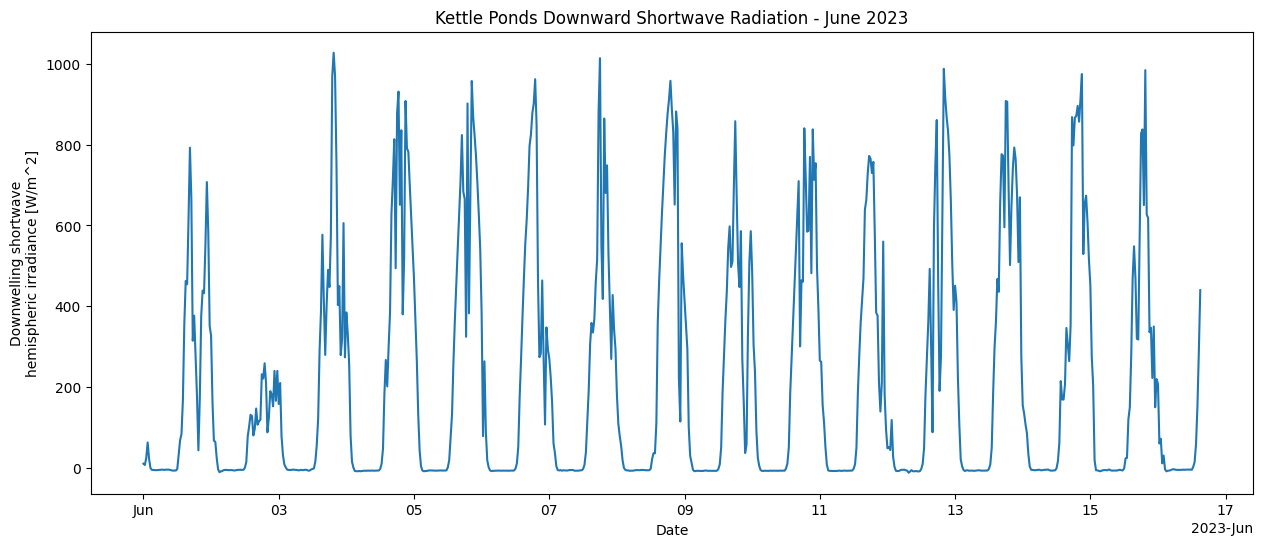

In [30]:
# selct from june 1 to june 20 2023
june_SWin = sail_sebs.down_short_hemisp.sel(time=slice('2023-06-01', '2023-06-20'))

fig, ax = plt.subplots(figsize=(15, 6))
june_SWin.plot(ax=ax)
plt.title('Kettle Ponds Downward Shortwave Radiation - June 2023')
plt.xlabel('Date')